<a href="https://colab.research.google.com/github/kwanderer/Autonomas-sistemas-un-roboti/blob/main/Copy_of_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import seaborn as sns 
%matplotlib inline

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
#os.chdir("/content/gdrive/MyDrive/Colab Notebooks/data_binary/")
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/data_multiclass/")

Mounted at /content/gdrive


In [3]:
#df = pd.read_csv("binary_data_csv.csv")
df = pd.read_csv("combined_multiclass_csv.csv")

In [4]:
df.head()

,tachometer,und-accelerometer-axial,und-accelerometer-radial,und-accelerometer-tangential,over-accelerometer-axial,over-accelerometer-radial,over-accelerometer-tangential,microphone,Class
0,-0.59640,1.65690,0.20359,0.048174,-0.18477,-0.021301,-0.18447,-0.017205,7
1,-0.52322,-0.28902,-0.31740,-0.001450,-0.19779,-0.023694,-0.28712,-0.018203,7
2,-0.55320,1.64770,0.41715,0.038655,-0.18563,-0.021564,-0.21215,-0.072039,7
3,-0.57723,0.15914,-0.33321,-0.011148,-0.19892,-0.025401,-0.30076,-0.007373,7
4,-0.49280,1.31650,0.41147,0.028096,-0.19165,-0.022879,-0.24147,-0.108590,7


In [5]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 30000000 rows and 9 columns.


In [6]:
sequence_length = 200

In [7]:
def generate_data(X, y, sequence_length = 200, step = 200):
    X_local = []
    y_local = []
    for start in range(0, len(df) - sequence_length, step):
        end = start + sequence_length
        X_local.append(X[start:end])
        y_local.append(y[end-1])
    return np.array(X_local), np.array(y_local)

X_sequence, y = generate_data(df.loc[:, ["tachometer", "und-accelerometer-axial", "und-accelerometer-radial", "und-accelerometer-tangential", "over-accelerometer-axial", "over-accelerometer-radial", "over-accelerometer-tangential", "microphone"]].values, df.Class)
#X_sequence, y = generate_data(data.loc[:, ["und-accelerometer-axial", "und-accelerometer-radial", "und-accelerometer-tangential", "microphone"]].values, data.Class)


In [8]:
X_sequence.shape, y.shape

((149999, 200, 8), (149999,))

In [9]:
#count of fraud vs. normal transactions 

counts = df.Class.value_counts()
#normal = counts[0]
#imbalance = counts[1]
#perc_normal = (normal/(normal+imbalance))*100
#perc_imbalance = (imbalance/(normal+imbalance))*100
#print('There were {} normal data ({:.3f}%) and {} imbalance transactions ({:.3f}%).'.format(normal, perc_normal, imbalance, perc_imbalance))

In [10]:
#plt.figure(figsize=(10,8))
#sns.barplot(X_sequence=counts.index, y=counts)
#plt.title('Normal vs. Imbalance')
#plt.ylabel('Count')
#plt.xlabel('Class (0:Normal, 1:Imbalance)')

Text(0.5, 1.0, 'Heatmap of Correlation')

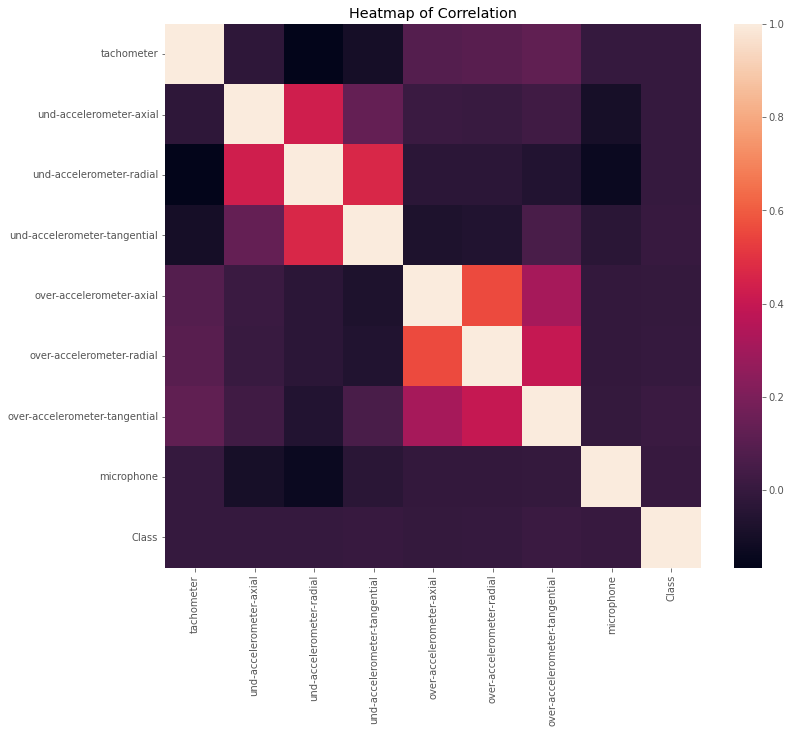

In [11]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [12]:
df.isnull().sum()

tachometer                       0
und-accelerometer-axial          0
und-accelerometer-radial         0
und-accelerometer-tangential     0
over-accelerometer-axial         0
over-accelerometer-radial        0
over-accelerometer-tangential    0
microphone                       0
Class                            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000000 entries, 0 to 29999999
Data columns (total 9 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   tachometer                     float64
 1   und-accelerometer-axial        float64
 2   und-accelerometer-radial       float64
 3   und-accelerometer-tangential   float64
 4   over-accelerometer-axial       float64
 5   over-accelerometer-radial      float64
 6   over-accelerometer-tangential  float64
 7   microphone                     float64
 8   Class                          int64  
dtypes: float64(8), int64(1)
memory usage: 2.0 GB


In [14]:
data=df.copy()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000000 entries, 0 to 29999999
Data columns (total 9 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   tachometer                     float64
 1   und-accelerometer-axial        float64
 2   und-accelerometer-radial       float64
 3   und-accelerometer-tangential   float64
 4   over-accelerometer-axial       float64
 5   over-accelerometer-radial      float64
 6   over-accelerometer-tangential  float64
 7   microphone                     float64
 8   Class                          int64  
dtypes: float64(8), int64(1)
memory usage: 2.0 GB


In [16]:
df = 0

**Model-1(Over Sampling)**

In [17]:
# Create two different dataframes of majority and minority class 
#df_fraud = data[data.Class==1]
#df_non_fraud = data[data.Class==0]

# Oversample the minority class
#from sklearn.utils import resample
#df_fraud_oversampled = resample(df_fraud, 
#                                 replace=True,    # sample with replacement
#                                 n_samples=len(df_non_fraud) , # to match majority class with len(df_majority) rows
#                                 random_state=42)  # reproducible results

# Combine majority class with oversampled minority class
#df_oversampled = pd.concat([df_fraud_oversampled, df_non_fraud])

In [18]:
#df_oversampled.Class.value_counts()

In [19]:
#g = sns.countplot(df_oversampled.Class)
#g.set_xticklabels(['Normal','Imbalance'])

In [20]:
# Target y and features X for developing NN models
#y = df_oversampled.Class
#X = df_oversampled.drop(['Class'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, roc_auc_score

In [22]:
shuffler = np.random.permutation(len(X_sequence))
X_sequence_shuffled = X_sequence[shuffler]
y_shuffled = y[shuffler]

In [23]:
training_size = int(len(X_sequence) * 0.8)
val_size = int(len(X_sequence) * 0.9)

In [24]:
X_train, y_train = X_sequence_shuffled[:training_size], y_shuffled[:training_size]
X_val, y_val = X_sequence_shuffled[training_size:val_size], y_shuffled[training_size:val_size]
X_test, y_test = X_sequence_shuffled[val_size:], y_shuffled[val_size:]

In [25]:
# split the data (X, y) to train-data and test-data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [26]:
X_train.shape, X_test.shape

((119999, 200, 8), (15000, 200, 8))

In [ ]:
data = 0
X_sequence = 0
y = 0

In [27]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [28]:
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()

In [29]:
#X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
X_train.shape, X_test.shape

((119999, 200, 8), (15000, 200, 8))

In [31]:
epochs=100
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D((1)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 32)           800       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 198, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 196, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 196, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 194, 64)           12352     
                                                                 
 flatten (Flatten)           (None, 12416)             0

In [32]:
# Compile the model as usual
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model_cnn.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [33]:
# Train the model
history = model_cnn.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/100
235/235 [==============================] - 20s 28ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1266
Epoch 2/100
235/235 [==============================] - 5s 22ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1266
Epoch 3/100
235/235 [==============================] - 5s 22ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1266
Epoch 4/100
235/235 [==============================] - 5s 22ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1266
Epoch 5/100
235/235 [==============================] - 5s 23ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1266
Epoch 6/100
235/235 [==============================] - 5s 22ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1266
Epoch 7/100
235/235 [==============================] - 5s 22ms/step - loss: 0.0000e+00 

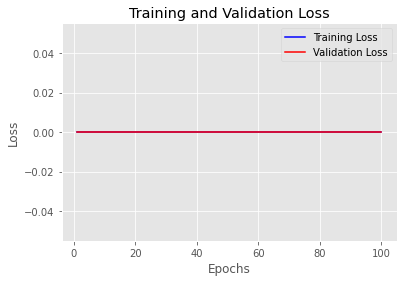

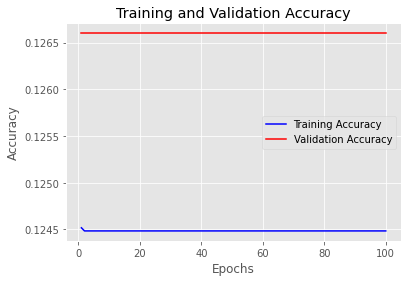

In [34]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc_plot.png')
plt.show()

In [35]:
val_predictions = model_cnn.predict(X_test)
pred=np.around(val_predictions)
pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1834
           1       0.13      1.00      0.23      1913
           2       0.00      0.00      0.00      1865
           3       0.00      0.00      0.00      1947
           4       0.00      0.00      0.00      1870
           5       0.00      0.00      0.00      1887
           6       0.00      0.00      0.00      1830
           7       0.00      0.00      0.00      1854

    accuracy                           0.13     15000
   macro avg       0.02      0.12      0.03     15000
weighted avg       0.02      0.13      0.03     15000



In [37]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1834
           1       0.13      1.00      0.23      1913
           2       0.00      0.00      0.00      1865
           3       0.00      0.00      0.00      1947
           4       0.00      0.00      0.00      1870
           5       0.00      0.00      0.00      1887
           6       0.00      0.00      0.00      1830
           7       0.00      0.00      0.00      1854

    accuracy                           0.13     15000
   macro avg       0.02      0.12      0.03     15000
weighted avg       0.02      0.13      0.03     15000



Text(0.5, 15.0, 'Predicted label')

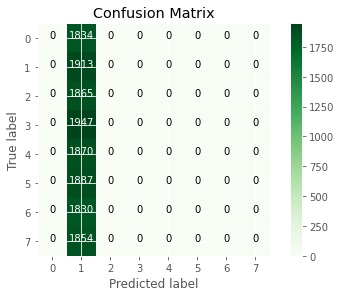

In [38]:
import itertools

print(classification_report(y_test, pred))

conf = get_confusion_matrix(y_test, pred)
conf

classes = [0, 1, 2, 3, 4, 5, 6, 7]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')